In [ ]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# Darstellung für max_columns
pd.set_option("display.max_columns", 500)

# Daten laden über api von open.data SG dafür wird requests benötigt
url = "https://daten.sg.ch/api/explore/v2.1/catalog/datasets/ladestationen-fur-elektroautos-im-kanton-stgallen/exports/csv"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text), sep=";") # erstelle aus api response einen Dataframe

# Kurze Spaltenübersicht erstellen
spalten_info = []

for col in df.columns:
    # Beispielwerte sammeln (nur eindeutige, nicht-null Werte)
    beispiele = df[col].dropna().unique()[:3] # NaN-Werte auslassen und df aktualisien
    beispiele_str = ", ".join([str(x)[:50] for x in beispiele])
    
    spalten_info.append({ # in spalten_info-list anfügen
        "Spaltenname": col,
        "Datentyp": str(df[col].dtype),
        "Nicht-Null": f"{df[col].notna().sum()} / {len(df)}",
        "Eindeutige Werte": df[col].nunique(),
        "Beispielwerte": beispiele_str if beispiele_str else "keine Werte"
    })

# df erstellen als spalte_df
spalten_df = pd.DataFrame(spalten_info)

# pretty print für df
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", 80)

# kurze Übersicht der Spaltennamen, Datentyp, NaN-werte, is-null-werte
print("=" * 120)
print(f"LADESTATIONEN FÜR ELEKTROAUTOS IM KANTON ST. GALLEN")
print(f"Gesamt: {len(df)} Ladestationen")
print("=" * 120)
print()
print(spalten_df.to_string(index=False))
print()
print("=" * 120)
print("\nNützliche Spalten zum Sortieren:")
print("  • address_city - Nach Stadt sortieren")
print("  • evsestatusrecord_evsestatus - Nach Status sortieren")
print("  • operatorname - Nach Betreiber sortieren")
print("  • maxcapacity - Nach maximaler Ladeleistung sortieren")
print("  • accessibility - Nach Zugänglichkeit sortieren")
print("=" * 120)

LADESTATIONEN FÜR ELEKTROAUTOS IM KANTON ST. GALLEN
Gesamt: 1176 Ladestationen

                     Spaltenname Datentyp  Nicht-Null  Eindeutige Werte                                                                                                                                              Beispielwerte
         evsestatusrecord_evseid   object 1176 / 1176              1176                                                                                                              CH*SWI*E15616, CH*SWI*E117867, CH*SWI*E164045
     evsestatusrecord_evsestatus   object 1176 / 1176                 4                                                                                                                          OutOfService, Available, Occupied
               chargingstationid   object 1176 / 1176               908                                                                                                              CH*SWI*E15616, CH*SWI*E117866, CH*SWI*E164047
            

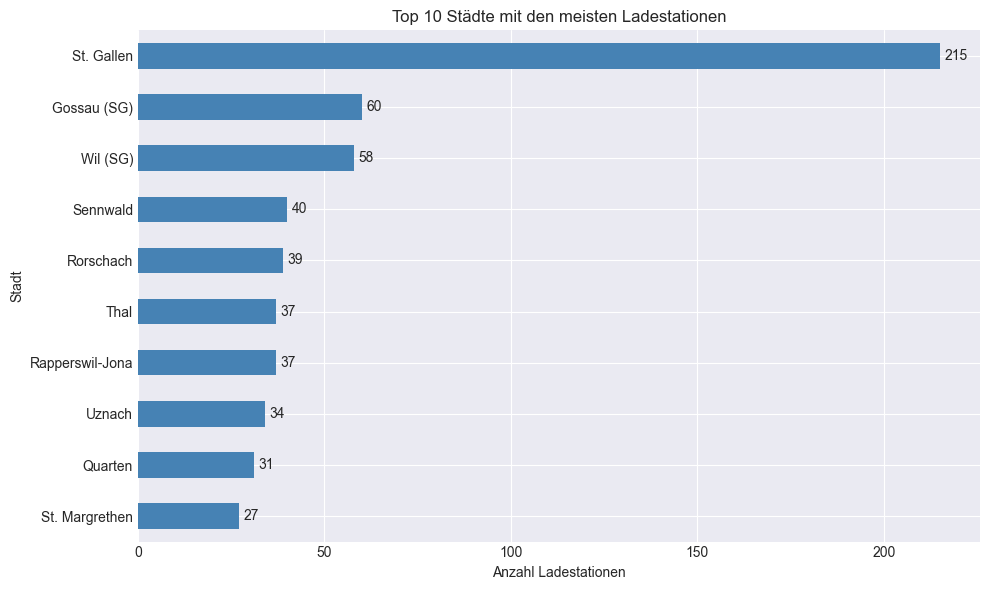

In [59]:
# Top 10 Städte mit den meisten Ladestationen
stadt_counts = df["address_city"].value_counts().head(10)
ax = stadt_counts.plot(kind="barh", figsize=(10, 6), color="steelblue")
# df["address_city"].value_counts().head(10).plot(kind="barh", figsize=(10, 6), color="steelblue")
plt.xlabel("Anzahl Ladestationen") # rename address_city auf y-Achse
plt.ylabel("Stadt")
plt.title("Top 10 Städte mit den meisten Ladestationen")

for i, v in enumerate(stadt_counts.values):
    ax.text(v + 1.2, i, str(v), va="center") # wenn man will kann man auch fontweight="bold" setzen für lesbarkeit
ax.invert_yaxis()

plt.tight_layout()
plt.show()
